<a href="https://colab.research.google.com/github/JOSHITHA6/GDP_PRODUCTIVITY_INFO/blob/main/GDP_PRODUCTION_NEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STEP-1: MERGING THE DATASET**

In [ ]:
#Merging the datasets

import pandas as pd

# URLs of the datasets hosted on GitHub
prod_url = 'https://raw.githubusercontent.com/JOSHITHA6/GDP_PRODUCTIVITY_INFO/main/DATASETS/Economy_Productivity_SD_India.csv'
gdp_url = 'https://raw.githubusercontent.com/JOSHITHA6/GDP_PRODUCTIVITY_INFO/main/DATASETS/GDP_Sector_Income_2019_2023_30Cities.csv'

# Load the datasets directly from GitHub
prod_df = pd.read_csv(prod_url)
gdp_df = pd.read_csv(gdp_url)

# Merge the datasets on 'City' and 'Year' using an inner join
merged_df = pd.merge(prod_df, gdp_df, on=['City', 'Year'], how='inner')

# Save the merged dataset to a CSV file locally
merged_df.to_csv('Merged_Productivity_GDP.csv', index=False)

# Print confirmation and display the first few rows of the merged dataset
print("Merged dataset has been saved as 'Merged_Productivity_GDP.csv'")
print(merged_df.head())


Merged dataset has been saved as 'Merged_Productivity_GDP.csv'
        City  Year  R&D Expenditure (% of GDP)  \
0  Ahmedabad  2019                        1.06   
1  Ahmedabad  2020                        1.93   
2  Ahmedabad  2021                        1.60   
3  Ahmedabad  2022                        1.40   
4  Ahmedabad  2023                        0.73   

   Patents per 100,000 Inhabitants  Unemployment Rate (%)  \
0                              3.4                    5.6   
1                              2.1                    6.6   
2                              6.6                    5.8   
3                              6.3                    6.2   
4                              2.9                    7.8   

   Youth Unemployment Rate (%)  SME Employment (%)  \
0                         11.8                38.5   
1                         10.4                19.5   
2                          8.9                16.7   
3                         10.7                33.5   

**STEP-2: DOWNLOAD THE MERGED DATASET**

In [ ]:
from google.colab import files

# Save the merged dataset
merged_df.to_csv('Merged_Productivity_GDP.csv', index=False)

# Download the file to your desktop
files.download('Merged_Productivity_GDP.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**NOTE** : The inner join only includes rows where the City and Year columns have matching values in both datasets.
Rows with City-Year pairs that don’t match in both datasets are dropped.

**Left Join**: Keeps all rows from the left dataset, even if there's no match in the right dataset.


**Outer Join**: Keeps all rows from both datasets, filling missing values with NaN.



**METHOD EMPLOYED FOR MERGING THE DATA SETS:**

pandas

**WORKING WITH MERGED DATSET**

In [ ]:
# Raw GitHub URL for your dataset
merged_url = 'https://raw.githubusercontent.com/JOSHITHA6/GDP_PRODUCTIVITY_INFO/main/DATASETS/Merged_Productivity_GDP.csv'
# Load the dataset
data = pd.read_csv(merged_url)

In [ ]:
#STEP-1: Check for missing values

print("\nMissing values per column:")
print(data.isnull().sum())


Missing values per column:
City                               0
Year                               0
R&D Expenditure (% of GDP)         0
Patents per 100,000 Inhabitants    0
Unemployment Rate (%)              0
Youth Unemployment Rate (%)        0
SME Employment (%)                 0
Tourism Sector Employment (%)      0
ICT Sector Employment (%)          0
GDP (in billion $)                 0
Agriculture (%)                    0
Industry (%)                       0
Services (%)                       0
Technology (%)                     0
dtype: int64


**IDENTIFY NUMERICAL COLUMNS**

In [ ]:
# Step-2: Identify numerical columns in the dataset
numerical_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns identified:", numerical_cols)


Numerical columns identified: Index(['Year', 'R&D Expenditure (% of GDP)', 'Patents per 100,000 Inhabitants',
       'Unemployment Rate (%)', 'Youth Unemployment Rate (%)',
       'SME Employment (%)', 'Tourism Sector Employment (%)',
       'ICT Sector Employment (%)', 'GDP (in billion $)', 'Agriculture (%)',
       'Industry (%)', 'Services (%)', 'Technology (%)'],
      dtype='object')


In [ ]:
#Step-3 Apply median imputation to fill missing values
for col in numerical_cols:
    if merged_df[col].isnull().sum() > 0:  # Check if there are missing values in the column
        median_value = merged_df[col].median()  # Calculate the median value
        merged_df[col].fillna(median_value, inplace=True)  # Fill missing values with the median
        print(f"Missing values in '{col}' handled by median imputation.")
    else:
        print(f"No missing values in '{col}'")

No missing values in 'Year'
No missing values in 'R&D Expenditure (% of GDP)'
No missing values in 'Patents per 100,000 Inhabitants'
No missing values in 'Unemployment Rate (%)'
No missing values in 'Youth Unemployment Rate (%)'
No missing values in 'SME Employment (%)'
No missing values in 'Tourism Sector Employment (%)'
No missing values in 'ICT Sector Employment (%)'
No missing values in 'GDP (in billion $)'
No missing values in 'Agriculture (%)'
No missing values in 'Industry (%)'
No missing values in 'Services (%)'
No missing values in 'Technology (%)'


In [ ]:
print(merged_df.columns)  # Print all column names


Index(['City', 'Year', 'R&D Expenditure (% of GDP)',
       'Patents per 100,000 Inhabitants', 'Unemployment Rate (%)',
       'Youth Unemployment Rate (%)', 'SME Employment (%)',
       'Tourism Sector Employment (%)', 'ICT Sector Employment (%)',
       'GDP (in billion $)', 'Agriculture (%)', 'Industry (%)', 'Services (%)',
       'Technology (%)'],
      dtype='object')


In [ ]:
# Rename columns for easier access
merged_df.rename(columns={
    'City': 'City',
    'Year': 'Year',
    'R&D Expenditure (% of GDP)': 'RD_Expenditure',
    'Patents per 100,000 Inhabitants': 'Patents_per_100k',
    'Unemployment Rate (%)': 'Unemployment_Rate',
    'Youth Unemployment Rate (%)': 'Youth_Unemployment_Rate',
    'SME Employment (%)': 'SME_Employment',
    'Tourism Sector Employment (%)': 'Tourism_Employment',
    'ICT Sector Employment (%)': 'ICT_Employment',
    'GDP (in billion $)': 'GDP_Billion',
    'Agriculture (%)': 'Agriculture_GDP',
    'Industry (%)': 'Industry_GDP',
    'Services (%)': 'Services_GDP',
    'Technology (%)': 'Technology_GDP'
}, inplace=True)

# Check the renamed columns
print(merged_df.columns)


Index(['City', 'Year', 'RD_Expenditure', 'Patents_per_100k',
       'Unemployment_Rate', 'Youth_Unemployment_Rate', 'SME_Employment',
       'Tourism_Employment', 'ICT_Employment', 'GDP_Billion',
       'Agriculture_GDP', 'Industry_GDP', 'Services_GDP', 'Technology_GDP'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 1: Identify categorical columns (those that are not numeric)
categorical_cols = merged_df.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)
print()
print()
# Step 2: Apply One-Hot Encoding to categorical columns (for non-ordinal columns)
merged_df_encoded = pd.get_dummies(merged_df, columns=categorical_cols, drop_first=True)

# Step 3: Optionally apply Label Encoding to ordinal columns (if any)
# Let's assume you have a list of ordinal columns (e.g., 'City_Size' as an example)
# If you don't know the ordinal columns, you can manually list them based on your domain knowledge
# Here, we will assume all columns that are categorical and have fewer unique values are ordinal
ordinal_cols = [col for col in categorical_cols if merged_df[col].nunique() < 5]

label_encoder = LabelEncoder()

# Apply Label Encoding to the identified ordinal columns
for col in ordinal_cols:
    merged_df_encoded[col] = label_encoder.fit_transform(merged_df_encoded[col])
    print(f"Label encoding applied to '{col}'")

# Display the new DataFrame with encoded columns
print(merged_df_encoded.head())


Index(['City'], dtype='object')


   Year  RD_Expenditure  Patents_per_100k  Unemployment_Rate  \
0  2019            1.06               3.4                5.6   
1  2020            1.93               2.1                6.6   
2  2021            1.60               6.6                5.8   
3  2022            1.40               6.3                6.2   
4  2023            0.73               2.9                7.8   

   Youth_Unemployment_Rate  SME_Employment  Tourism_Employment  \
0                     11.8            38.5                 5.2   
1                     10.4            19.5                 4.2   
2                      8.9            16.7                 5.1   
3                     10.7            33.5                 7.5   
4                     10.5            29.4                 6.5   

   ICT_Employment  GDP_Billion  Agriculture_GDP  ...  City_Delhi  \
0            20.7        187.2             15.7  ...       False   
1             6.8        211.5             11.6 

**CHECKING FOR OUTLIERS**

Methods used:
 Z-Score
and IQR METHOD

Preferably, use IQR method, bcoz it is suitable for skewed datasets and non-normal distributions.

z-score method is more useful when data follows a normal distribution. It works well for datasets where values are relatively symmetric.




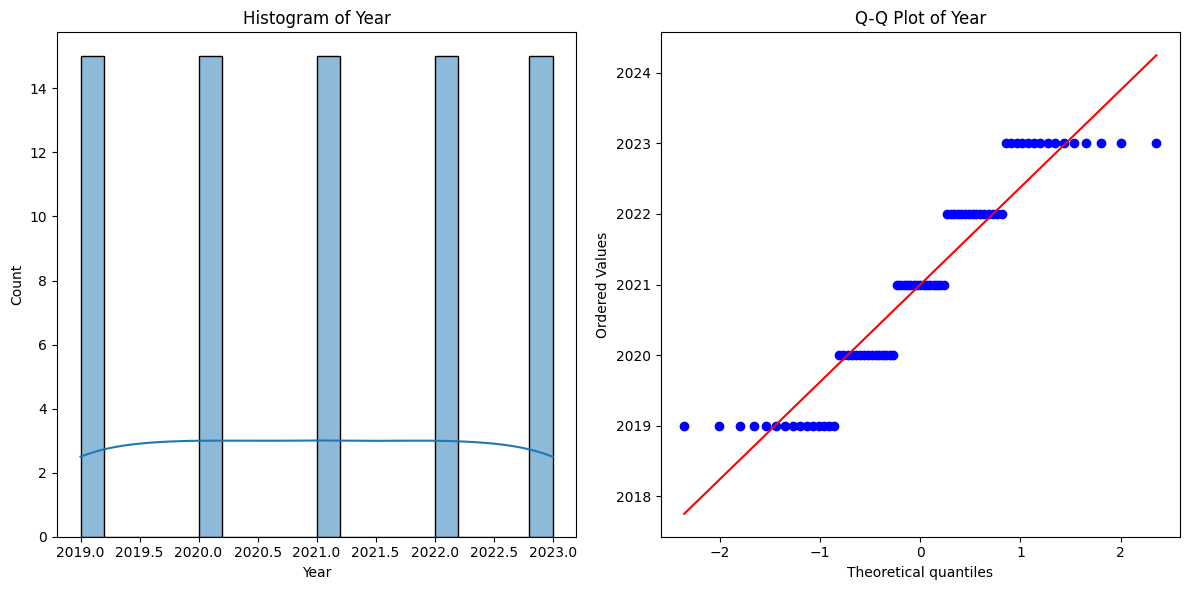

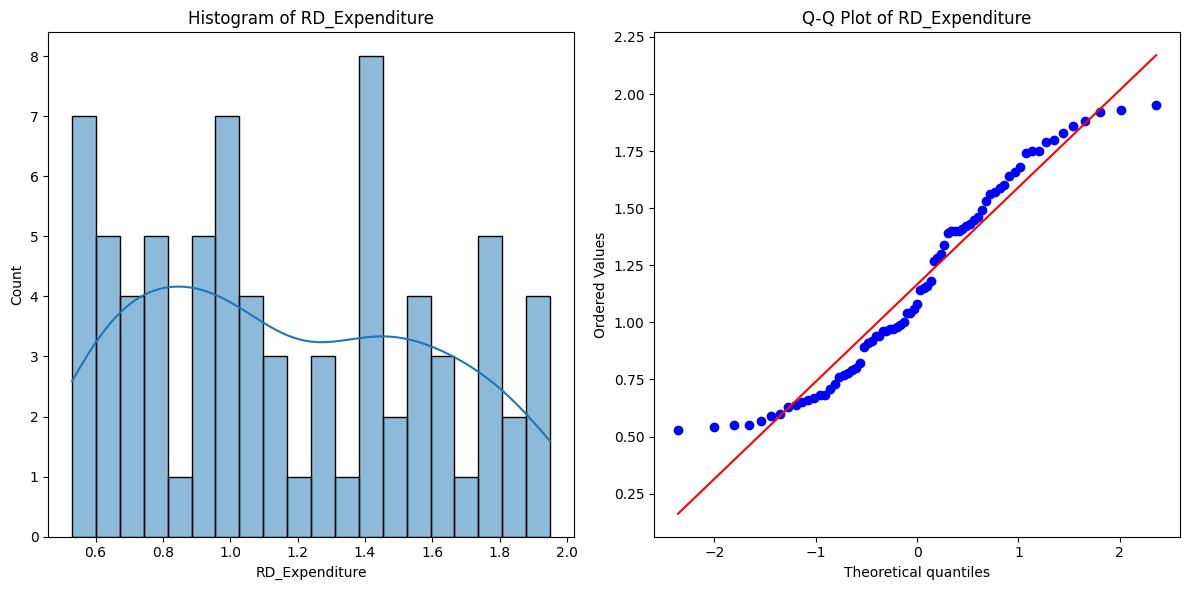

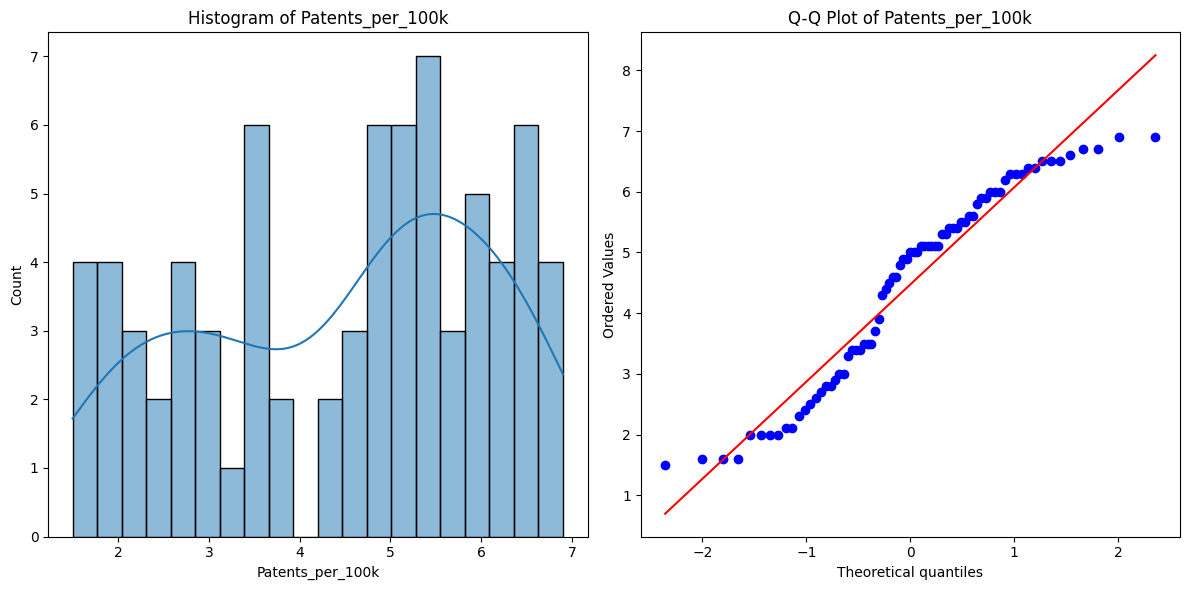

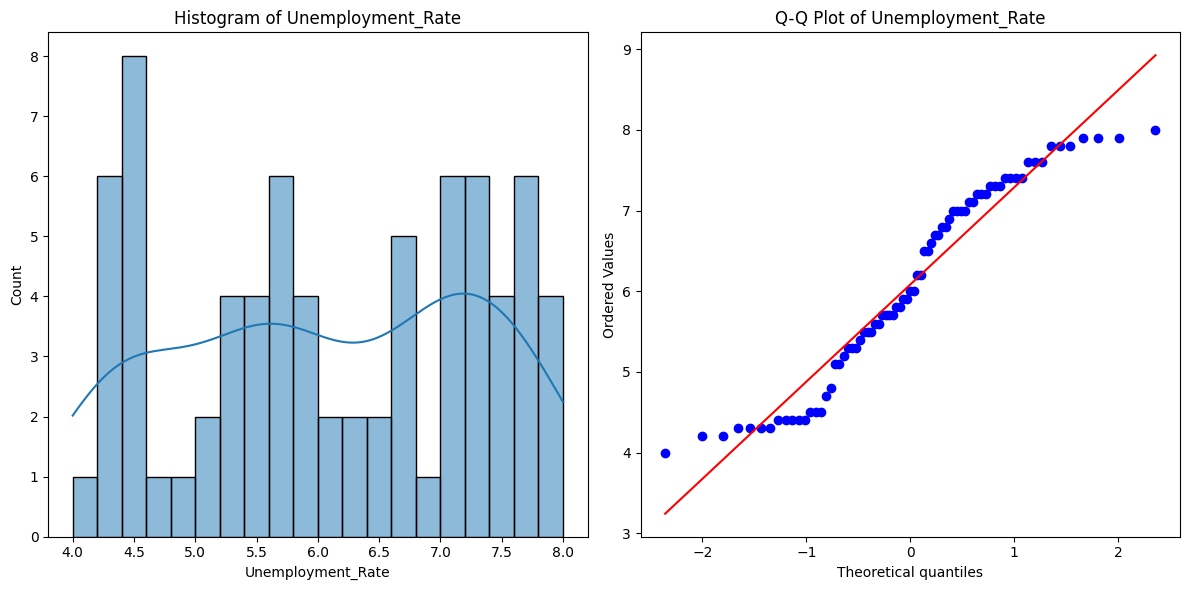

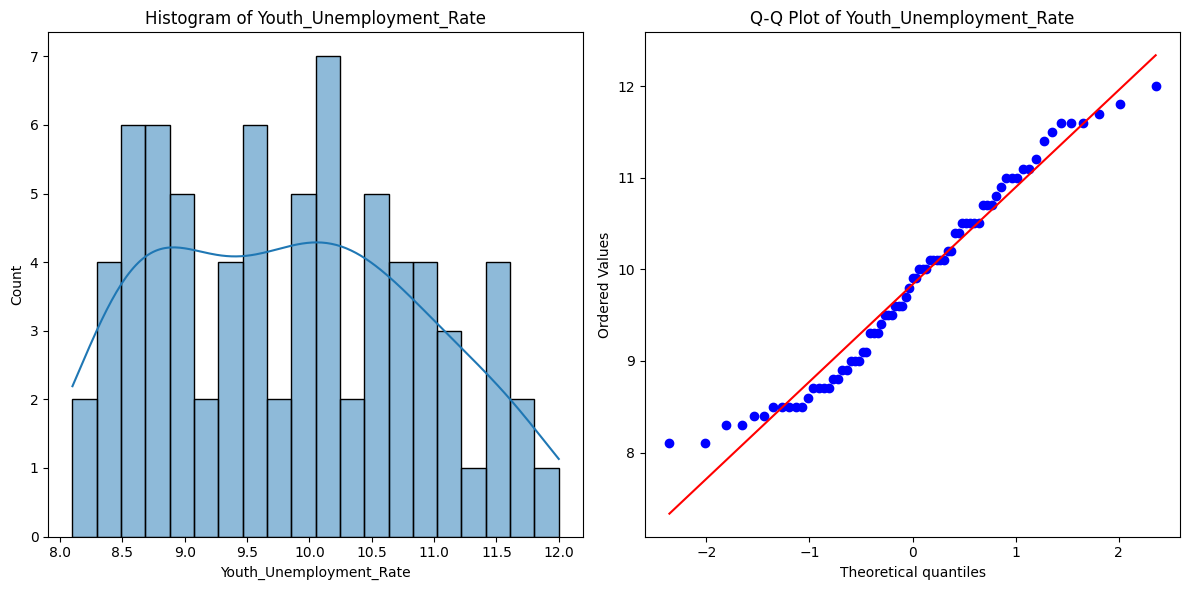

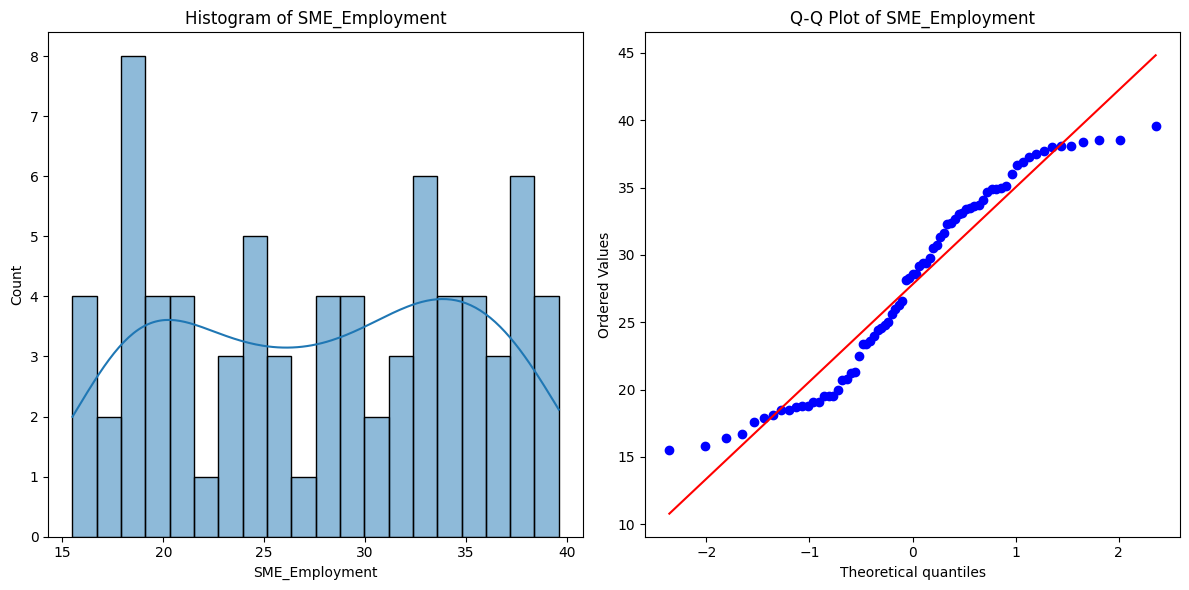

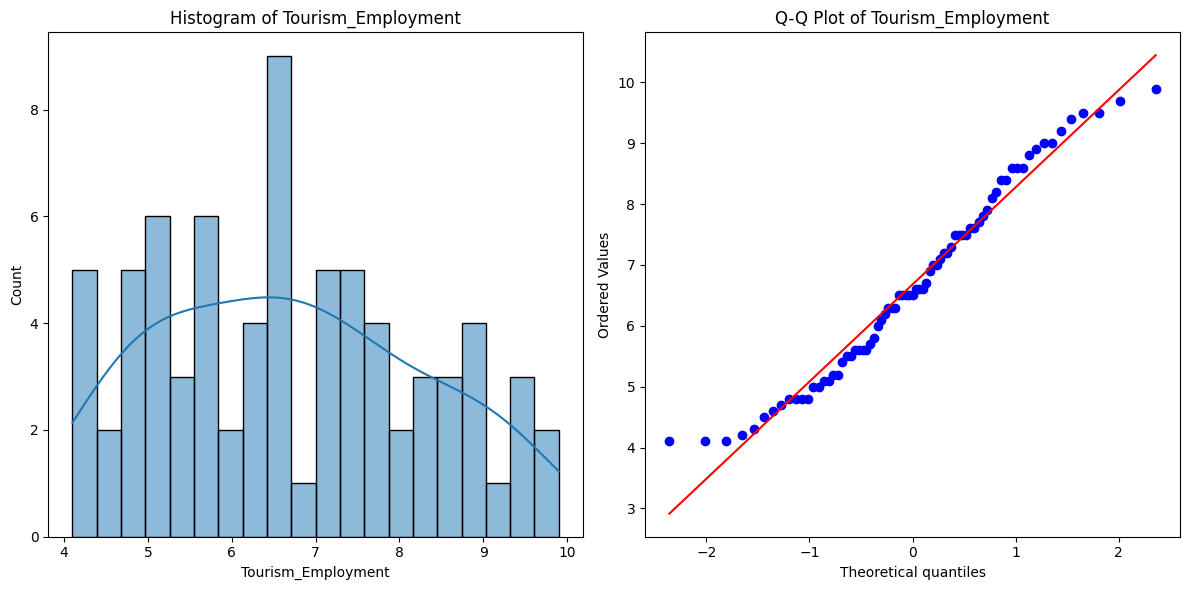

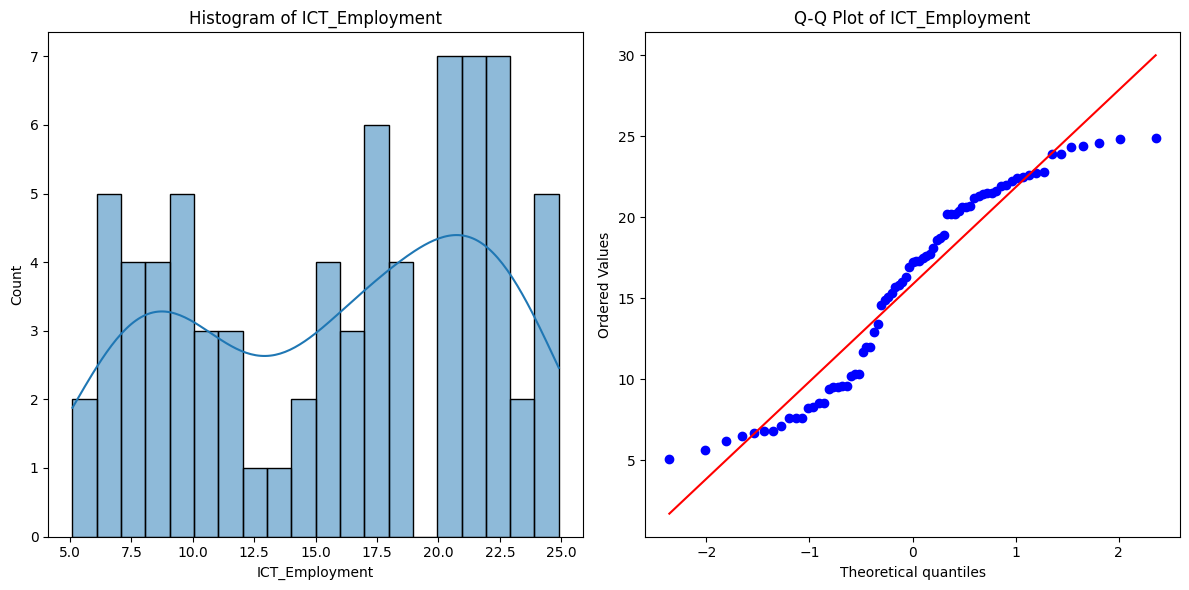

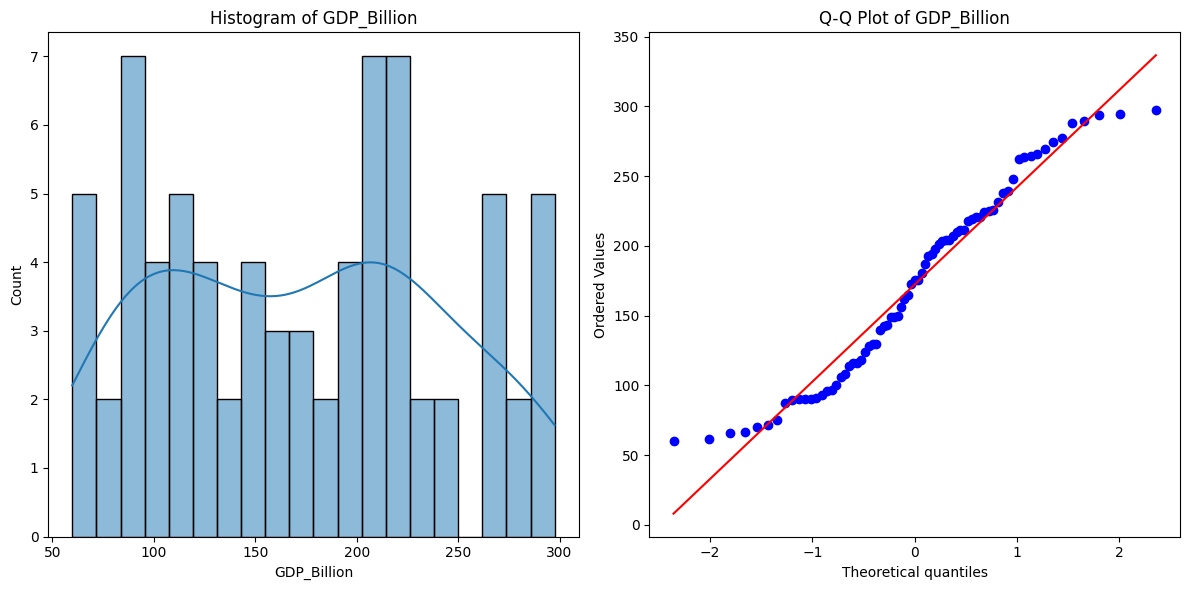

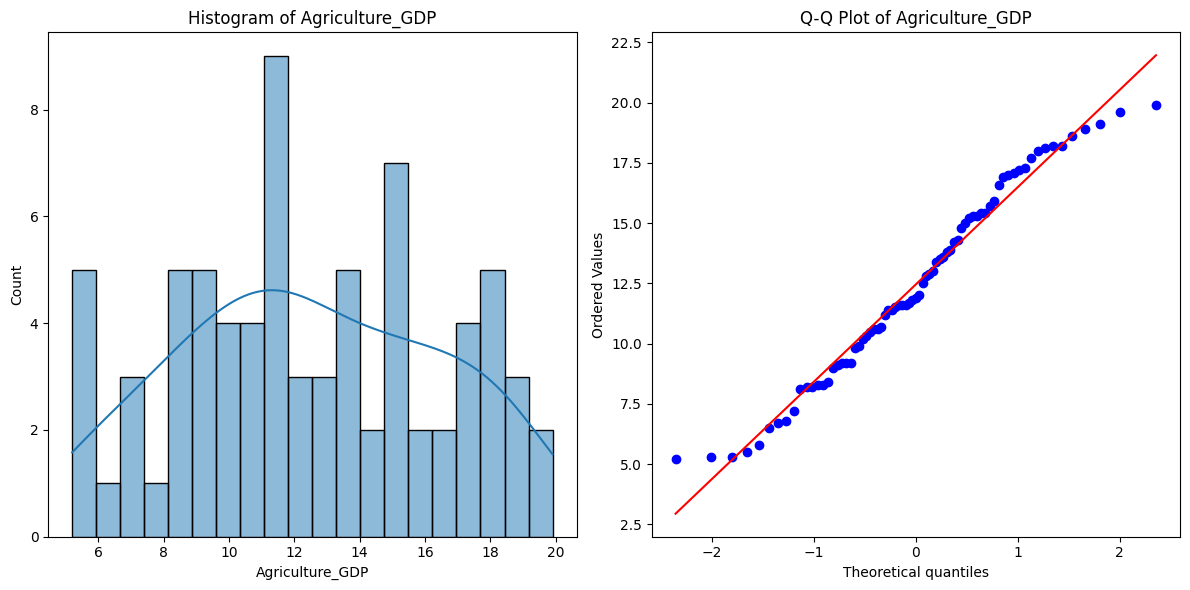

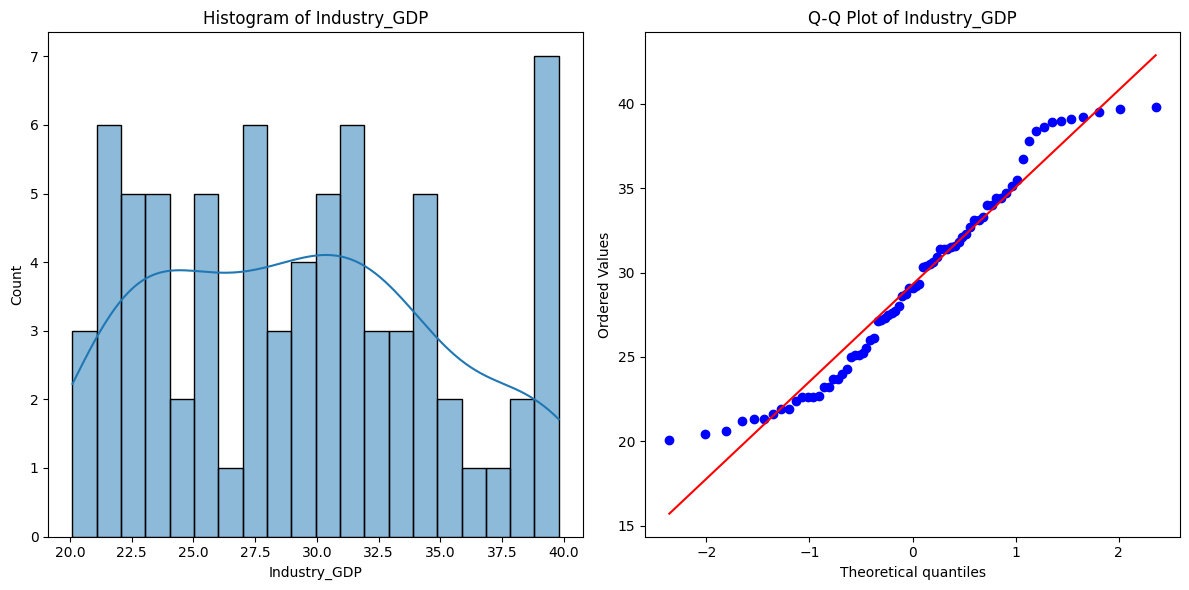

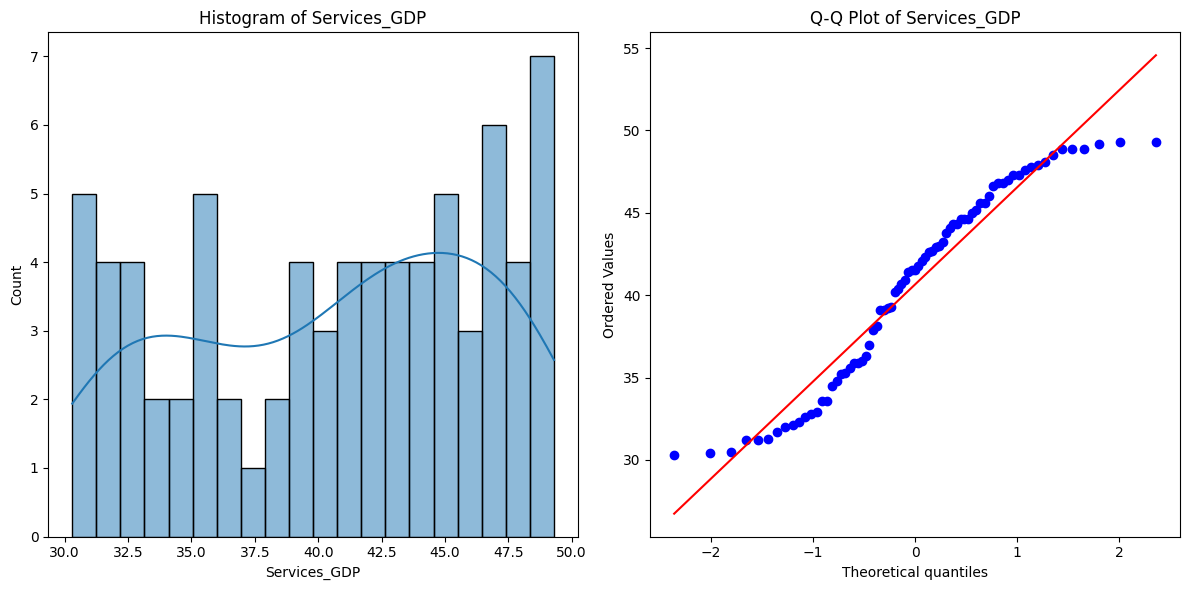

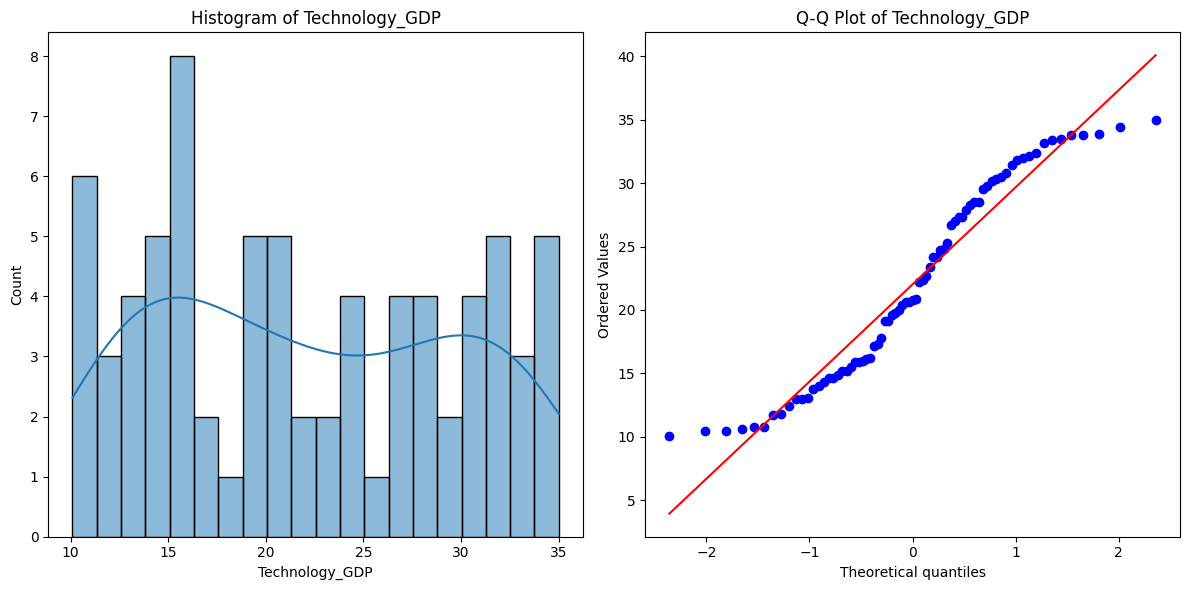

In [ ]:
#To check the data is noramlly distributed or skewd, we are using histogram and qq plots. Based on this, we will map our outliers.

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Plot histogram for each numerical column
numerical_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(merged_df[col], kde=True, bins=20)
    plt.title(f'Histogram of {col}')

    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(merged_df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')

    plt.tight_layout()
    plt.show()


**FINDING WHETHER DATA IS NORMALLY DISTRIBUTED/NOT**  

After visually inspecting the data, you can confirm normality using statistical tests. If the data is bell-shaped in the histogram and the Q-Q plot is approximately linear, it is likely normally distributed. To confirm, you can run a Shapiro-Wilk test.

In [ ]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for each numerical column
for col in numerical_cols:
    stat, p_value = shapiro(merged_df[col].dropna())  # Drop NaN values before testing
    print(f"Shapiro-Wilk Test for {col}:")
    print(f"Statistic: {stat}, p-value: {p_value}")

    if p_value > 0.05:
        print(f"The data for {col} seems to follow a normal distribution.")
    else:
        print(f"The data for {col} does not follow a normal distribution.")
    print("-" * 50)


Shapiro-Wilk Test for Year:
Statistic: 0.8877631947456237, p-value: 7.057376666092079e-06
The data for Year does not follow a normal distribution.
--------------------------------------------------
Shapiro-Wilk Test for RD_Expenditure:
Statistic: 0.9419068653634225, p-value: 0.0018402157750383994
The data for RD_Expenditure does not follow a normal distribution.
--------------------------------------------------
Shapiro-Wilk Test for Patents_per_100k:
Statistic: 0.9311270362679642, p-value: 0.0005265650961397165
The data for Patents_per_100k does not follow a normal distribution.
--------------------------------------------------
Shapiro-Wilk Test for Unemployment_Rate:
Statistic: 0.9310075500104232, p-value: 0.0005195533434990854
The data for Unemployment_Rate does not follow a normal distribution.
--------------------------------------------------
Shapiro-Wilk Test for Youth_Unemployment_Rate:
Statistic: 0.9609304707021115, p-value: 0.02076183639584367
The data for Youth_Unemployment

**OBSERVATION:** As most of the data columns are not following a normal distribution, I'm going with inter-quartile range

In [ ]:
# Iterate through each numerical column
for col in numerical_cols:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = merged_df[col].quantile(0.25)
    Q3 = merged_df[col].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find the outliers
    outliers = merged_df[(merged_df[col] < lower_bound) | (merged_df[col] > upper_bound)]

    # Print outliers information
    print(f"Outliers for {col}:")
    print(outliers)
    print(f"Number of outliers for {col}: {len(outliers)}")
    print("-" * 50)


Outliers for Year:
Empty DataFrame
Columns: [City, Year, RD_Expenditure, Patents_per_100k, Unemployment_Rate, Youth_Unemployment_Rate, SME_Employment, Tourism_Employment, ICT_Employment, GDP_Billion, Agriculture_GDP, Industry_GDP, Services_GDP, Technology_GDP]
Index: []
Number of outliers for Year: 0
--------------------------------------------------
Outliers for RD_Expenditure:
Empty DataFrame
Columns: [City, Year, RD_Expenditure, Patents_per_100k, Unemployment_Rate, Youth_Unemployment_Rate, SME_Employment, Tourism_Employment, ICT_Employment, GDP_Billion, Agriculture_GDP, Industry_GDP, Services_GDP, Technology_GDP]
Index: []
Number of outliers for RD_Expenditure: 0
--------------------------------------------------
Outliers for Patents_per_100k:
Empty DataFrame
Columns: [City, Year, RD_Expenditure, Patents_per_100k, Unemployment_Rate, Youth_Unemployment_Rate, SME_Employment, Tourism_Employment, ICT_Employment, GDP_Billion, Agriculture_GDP, Industry_GDP, Services_GDP, Technology_GDP]
I

**OUTLIERS OBSERVATION:** It is observed that there are no outliers in the dataset

In [ ]:
# Step-4 Remove duplicate rows if any
initial_row_count = merged_df.shape[0]
merged_df.drop_duplicates(inplace=True)
final_row_count = merged_df.shape[0]
print(f"Removed {initial_row_count - final_row_count} duplicate rows.")


Removed 0 duplicate rows.


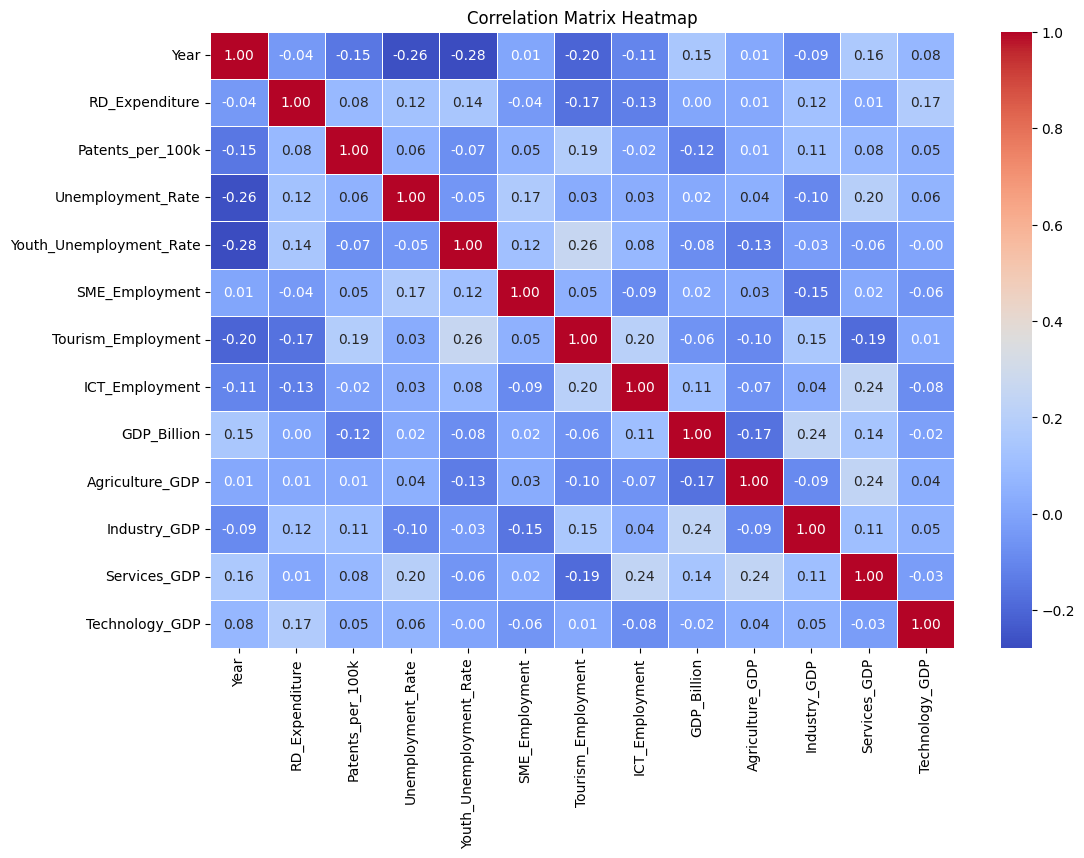

In [ ]:
#Step-5 Check for highly correlated columns so as to drop any unnecessary columns

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming merged_df is your DataFrame with the cleaned data

# Select only numerical columns for correlation calculation
numerical_df = merged_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Set up the figure size for the heatmap
plt.figure(figsize=(12, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add a title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

In [ ]:
# Identify highly correlated columns (threshold = 0.8)
threshold = 0.8

# Create a mask to identify columns with high correlation
# First, get the upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)  # Use numpy instead of pd.np
)

# Find columns with correlation greater than the threshold
highly_correlated_pairs = [
    (column, index)
    for column in upper_triangle.columns
    for index in upper_triangle.index
    if abs(upper_triangle.loc[index, column]) > threshold
]

# Print highly correlated pairs
print("Highly correlated pairs (correlation > 0.8):")
for pair in highly_correlated_pairs:
    print(pair)

# Step-6: Drop one of each pair of highly correlated columns
columns_to_drop = [pair[1] for pair in highly_correlated_pairs]  # Drop the second column in each pair

# Drop the columns
merged_df.drop(columns=columns_to_drop, inplace=True)

print(f"Dropped columns: {columns_to_drop}")


Highly correlated pairs (correlation > 0.8):
Dropped columns: []


In [ ]:
#Step-6 Perform cleaning to ur dataset

cleaned_data=merged_df.copy()

In [ ]:
# Combine original and cleaned datasets for comparison
# This will add the cleaned columns to the original dataset for comparison
comparison = pd.concat([merged_df, cleaned_data], axis=1, keys=["Original", "Cleaned"])

# Show the combined comparison (only first few rows to prevent large output)
comparison.head()

Original                                                          \
        City  Year RD_Expenditure Patents_per_100k Unemployment_Rate   
0  Ahmedabad  2019           1.06              3.4               5.6   
1  Ahmedabad  2020           1.93              2.1               6.6   
2  Ahmedabad  2021           1.60              6.6               5.8   
3  Ahmedabad  2022           1.40              6.3               6.2   
4  Ahmedabad  2023           0.73              2.9               7.8   

                                                                            \
  Youth_Unemployment_Rate SME_Employment Tourism_Employment ICT_Employment   
0                    11.8           38.5                5.2           20.7   
1                    10.4           19.5                4.2            6.8   
2                     8.9           16.7                5.1           13.4   
3                    10.7           33.5                7.5           22.6   
4                    10.5           29.4                6.5           23.9   

               ...           Cleaned                                         \
  GDP_Billion  ... Unemployment_Rate Youth_Unemployment_Rate SME_Employment   
0       187.2  ...               5.6                    11.8           38.5   
1       211.5  ...               6.6                    10.4           19.5   
2       247.9  ...               5.8                     8.9           16.7   
3        71.8  ...               6.2                    10.7           33.5   
4       294.7  ...               7.8                    10.5           29.4   

                                                                              \
  Tourism_Employment ICT_Employment GDP_Billion Agriculture_GDP Industry_GDP   
0                5.2           20.7       187.2            15.7         32.1   
1                4.2            6.8       211.5            11.6         37.8   
2                5.1           13.4       247.9            12.9         31.4   
3                7.5           22.6        71.8             5.3         36.7   
4                6.5           23.9       294.7            17.0         29.2   

                               
  Services_GDP Technology_GDP  
0         40.9           20.6  
1         49.3           19.6  
2         48.5           11.8  
3         45.6           31.8  
4         45.6           13.0  

[5 rows x 28 columns]

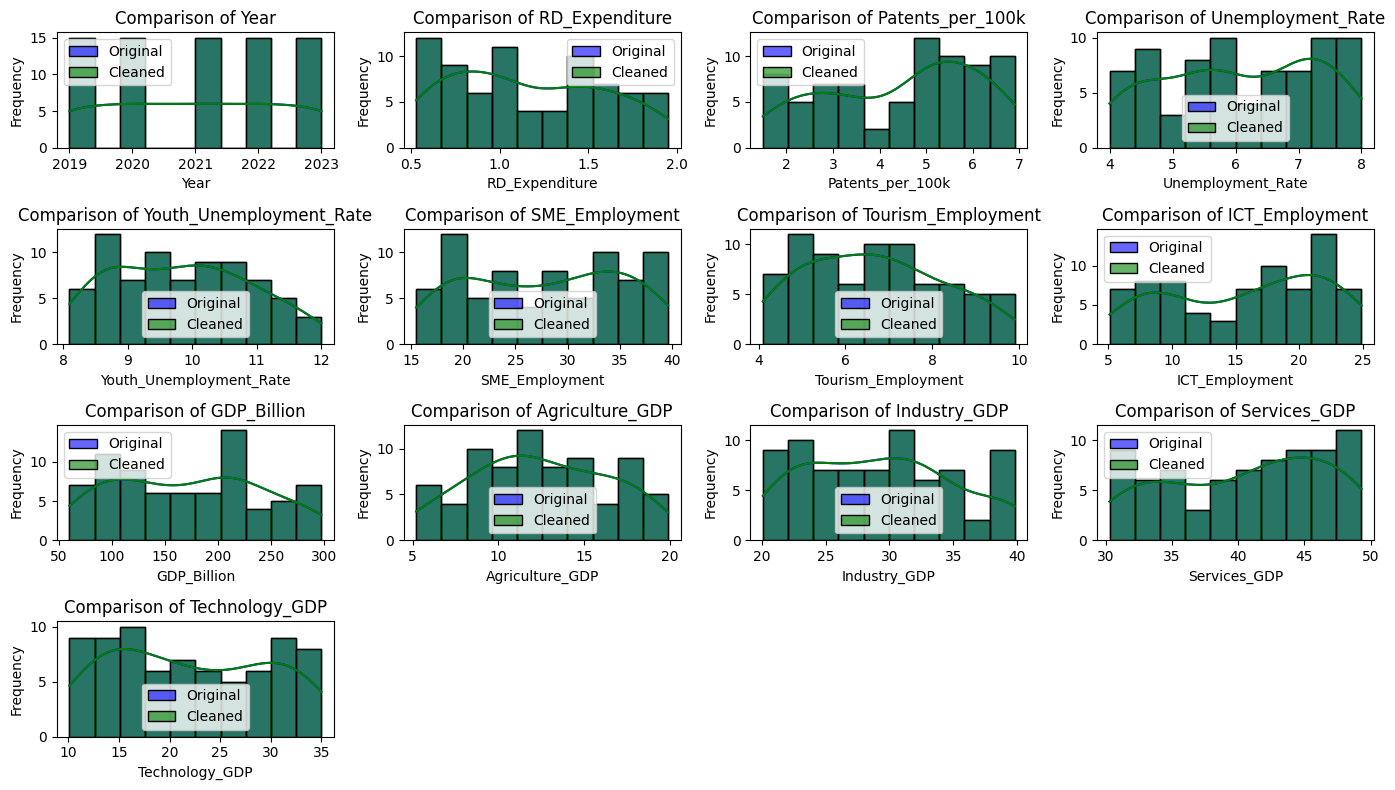

In [ ]:
#Step-7
#DATA VISUALISATION

import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to compare (you can dynamically get this from the DataFrame)
numerical_columns = merged_df.select_dtypes(include=['float64', 'int64']).columns

# Create a plot for each of the numerical columns
plt.figure(figsize=(14, 8))

# Iterate over all numerical columns
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)  # Adjust the number of rows and columns based on the number of columns
    sns.histplot(merged_df[column], color='blue', label='Original', kde=True, bins=10, alpha=0.6)
    sns.histplot(cleaned_data[column], color='green', label='Cleaned', kde=True, bins=10, alpha=0.6)

    # Add titles and labels
    plt.title(f"Comparison of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.legend()

plt.tight_layout()  # Adjust layout for better readability
plt.show()

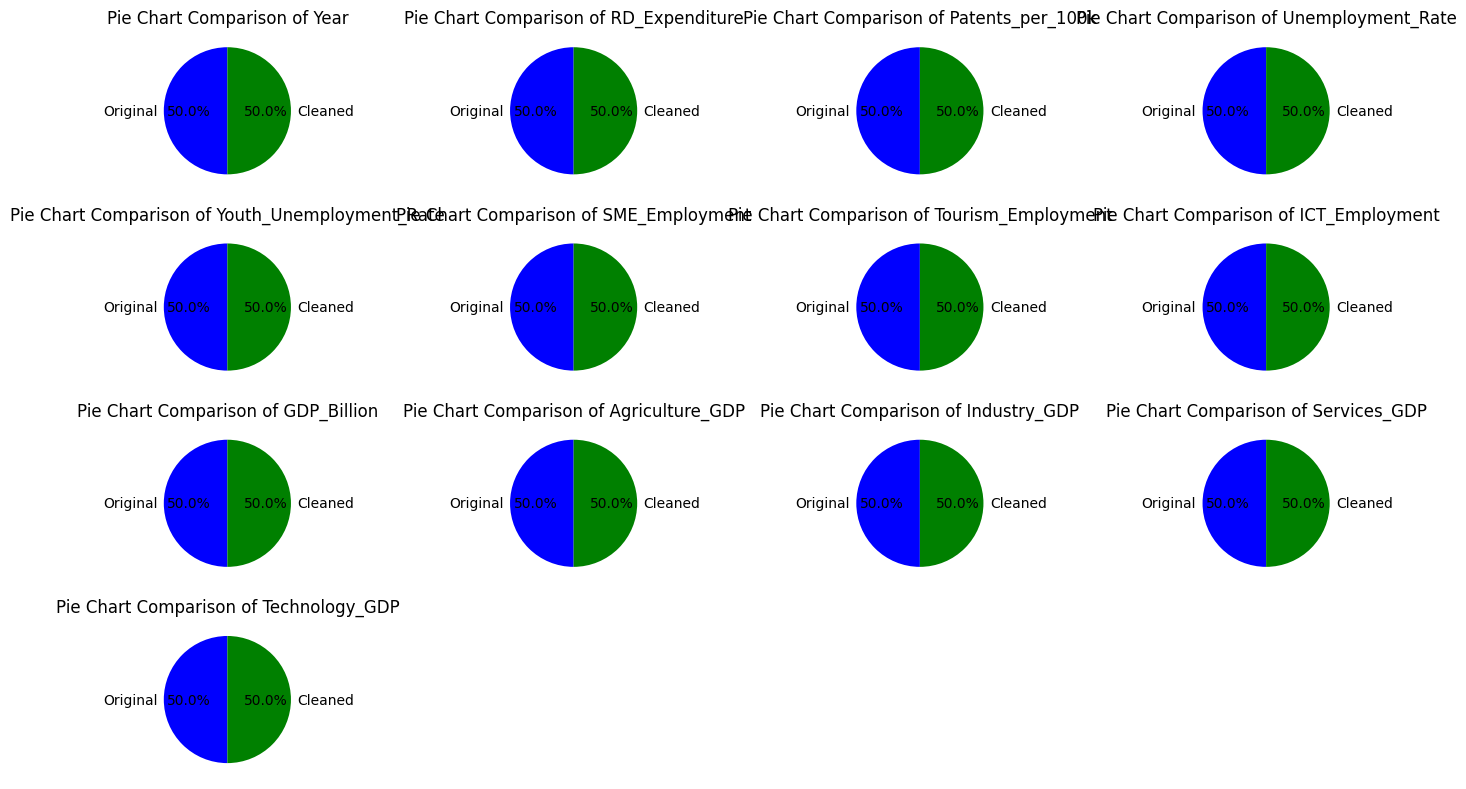

In [ ]:
import matplotlib.pyplot as plt

# List of all numerical columns in the merged dataset
numerical_columns = merged_df.select_dtypes(include=['float64', 'int64']).columns

# Create a plot for each of the numerical columns
plt.figure(figsize=(14, 8))

# Iterate over all numerical columns in the merged dataset
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)  # Adjust the number of rows and columns based on the number of columns

    # Prepare the data for pie charts (sum of values for each column)
    original_sum = merged_df[column].sum()
    cleaned_sum = cleaned_data[column].sum()

    # Pie chart labels and values
    labels = ['Original', 'Cleaned']
    values = [original_sum, cleaned_sum]

    # Create pie chart
    plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['blue', 'green'], startangle=90)
    plt.title(f"Pie Chart Comparison of {column}")

plt.tight_layout()  # Adjust layout for better readability
plt.show()


**OBSERVATIONS AND KEY-TAKE AWAYS**

The dataset which I have downloaded from kaggle is such a fine and high quality data beacause few datsets obtained from govt. websites will be of highly fine and of high quality. I've found this difference by comparing original data and cleaned data. In pie charts and summary statistics, no change is seen--> indicating that the dataset which I've got is very clean dataset and actually doesnt need any pre-processing/cleaning.



Also, there are no missing values/nan values found indicating that the dataset is already clean and pre-processed

In [ ]:
# Select numerical columns for summary statistics
numerical_columns = merged_df.select_dtypes(include=['float64', 'int64']).columns

# Summary statistics for the original merged data
print("Summary Statistics - Original Merged Data:")
print(merged_df[numerical_columns].describe())
print()

# If you have cleaned data in `cleaned_data`, you can compare it as well
# Assuming `cleaned_data` is already defined
print("Summary Statistics - Cleaned Merged Data:")
print(cleaned_data[numerical_columns].describe())


Summary Statistics - Original Merged Data:
              Year  RD_Expenditure  Patents_per_100k  Unemployment_Rate  \
count    75.000000       75.000000         75.000000          75.000000   
mean   2021.000000        1.166000          4.473333           6.084000   
std       1.423737        0.427883          1.619254           1.217556   
min    2019.000000        0.530000          1.500000           4.000000   
25%    2020.000000        0.785000          3.000000           5.150000   
50%    2021.000000        1.080000          5.000000           6.000000   
75%    2022.000000        1.510000          5.850000           7.200000   
max    2023.000000        1.950000          6.900000           8.000000   

       Youth_Unemployment_Rate  SME_Employment  Tourism_Employment  \
count                75.000000       75.000000           75.000000   
mean                  9.834667       27.805333            6.680000   
std                   1.056958        7.283263            1.587791   
m

In [ ]:
import pandas as pd

# Assuming `cleaned_data` is the pre-processed DataFrame
# Ensure you have a 'Year' column in the dataset

# Step 1: Group by Year
yearly_data = cleaned_data.groupby('Year')

# Step 2: Calculate Year-by-Year Metrics
yearly_metrics = yearly_data.agg({
    'GDP_Billion': 'sum',  # Total GDP per year
    'Agriculture_GDP': 'mean',
    'Industry_GDP': 'mean',
    'Services_GDP': 'mean',
    'Technology_GDP': 'mean',
    'Agriculture_GDP': 'sum',
    'Industry_GDP': 'sum',
    'Services_GDP': 'sum',
    'Technology_GDP': 'sum'
}).reset_index()

# Rename columns for clarity
yearly_metrics.rename(columns={
    'GDP_Billion': 'Total_GDP_Billion',
    'Agriculture_GDP': 'Avg_Agriculture_GDP',
    'Industry_GDP': 'Avg_Industry_GDP',
    'Services_GDP': 'Avg_Services_GDP',
    'Technology_GDP': 'Avg_Technology_GDP',
    'Agriculture_GDP': 'Total_Agriculture_GDP',
    'Industry_GDP': 'Total_Industry_GDP',
    'Services_GDP': 'Total_Services_GDP',
    'Technology_GDP': 'Total_Technology_GDP'
}, inplace=True)

# Step 3: Calculate Percentages for Each Sector
yearly_metrics['Agriculture_Contribution_Percent'] = (yearly_metrics['Total_Agriculture_GDP'] / yearly_metrics['Total_GDP_Billion']) * 100
yearly_metrics['Industry_Contribution_Percent'] = (yearly_metrics['Total_Industry_GDP'] / yearly_metrics['Total_GDP_Billion']) * 100
yearly_metrics['Services_Contribution_Percent'] = (yearly_metrics['Total_Services_GDP'] / yearly_metrics['Total_GDP_Billion']) * 100
yearly_metrics['Technology_Contribution_Percent'] = (yearly_metrics['Total_Technology_GDP'] / yearly_metrics['Total_GDP_Billion']) * 100

# Display Year-by-Year Analysis
print(yearly_metrics)


   Year  Total_GDP_Billion  Total_Agriculture_GDP  Total_Industry_GDP  \
0  2019             2518.6                  183.0               461.7   
1  2020             2322.8                  190.3               421.2   
2  2021             2702.5                  190.7               462.2   
3  2022             2310.9                  177.9               414.4   
4  2023             3067.0                  192.2               437.4   

   Total_Services_GDP  Total_Technology_GDP  Agriculture_Contribution_Percent  \
0               598.9                 282.1                          7.265941   
1               578.9                 371.3                          8.192698   
2               611.5                 321.2                          7.056429   
3               643.7                 355.9                          7.698299   
4               615.8                 320.4                          6.266710   

   Industry_Contribution_Percent  Services_Contribution_Percent  \
0      

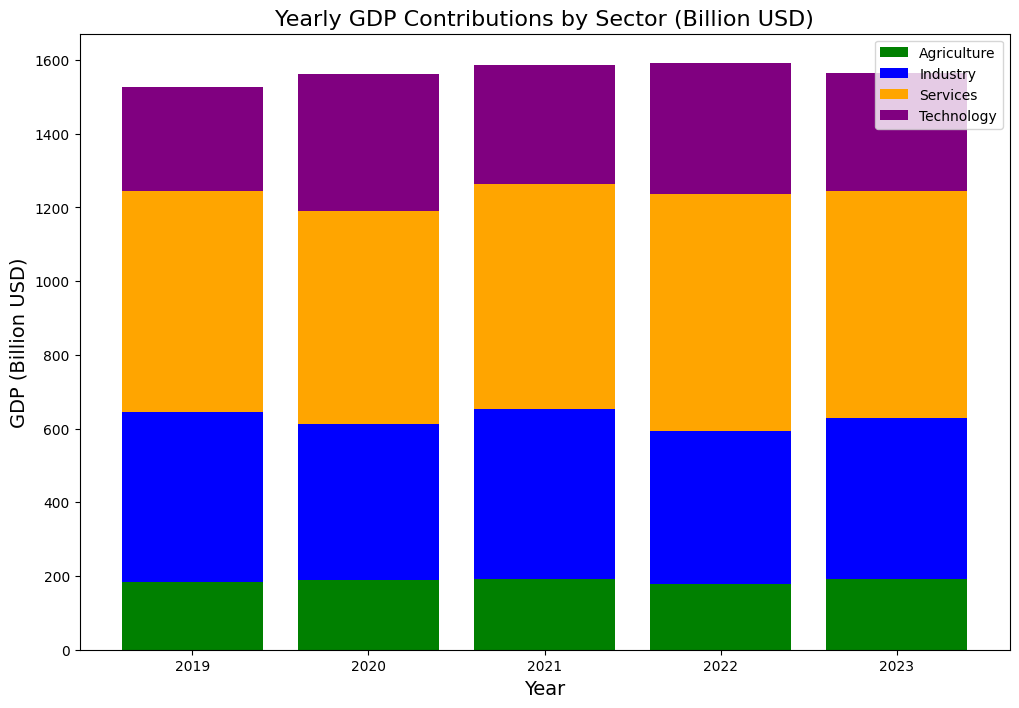

In [ ]:
plt.figure(figsize=(12, 8))
plt.bar(yearly_metrics['Year'], yearly_metrics['Total_Agriculture_GDP'], label='Agriculture', color='green')
plt.bar(yearly_metrics['Year'], yearly_metrics['Total_Industry_GDP'], label='Industry', bottom=yearly_metrics['Total_Agriculture_GDP'], color='blue')
plt.bar(yearly_metrics['Year'], yearly_metrics['Total_Services_GDP'], label='Services', bottom=yearly_metrics['Total_Agriculture_GDP'] + yearly_metrics['Total_Industry_GDP'], color='orange')
plt.bar(yearly_metrics['Year'], yearly_metrics['Total_Technology_GDP'], label='Technology', bottom=yearly_metrics['Total_Agriculture_GDP'] + yearly_metrics['Total_Industry_GDP'] + yearly_metrics['Total_Services_GDP'], color='purple')
plt.title("Yearly GDP Contributions by Sector (Billion USD)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("GDP (Billion USD)", fontsize=14)
plt.legend()
plt.show()


In [ ]:
# List of economic productivity columns
economic_productivity_columns = [
    'RD_Expenditure', 'Patents_per_100k', 'Unemployment_Rate',
    'Youth_Unemployment_Rate', 'SME_Employment', 'Tourism_Employment',
    'ICT_Employment', 'GDP_Billion'
]

# Calculate summary statistics for economic productivity columns
summary_statistics = cleaned_data[economic_productivity_columns].describe()

# Display summary statistics
print("Summary Statistics for Economic Productivity Metrics:")
print(summary_statistics)


Summary Statistics for Economic Productivity Metrics:
       RD_Expenditure  Patents_per_100k  Unemployment_Rate  \
count       75.000000         75.000000          75.000000   
mean         1.166000          4.473333           6.084000   
std          0.427883          1.619254           1.217556   
min          0.530000          1.500000           4.000000   
25%          0.785000          3.000000           5.150000   
50%          1.080000          5.000000           6.000000   
75%          1.510000          5.850000           7.200000   
max          1.950000          6.900000           8.000000   

       Youth_Unemployment_Rate  SME_Employment  Tourism_Employment  \
count                75.000000       75.000000           75.000000   
mean                  9.834667       27.805333            6.680000   
std                   1.056958        7.283263            1.587791   
min                   8.100000       15.500000            4.100000   
25%                   8.900000       

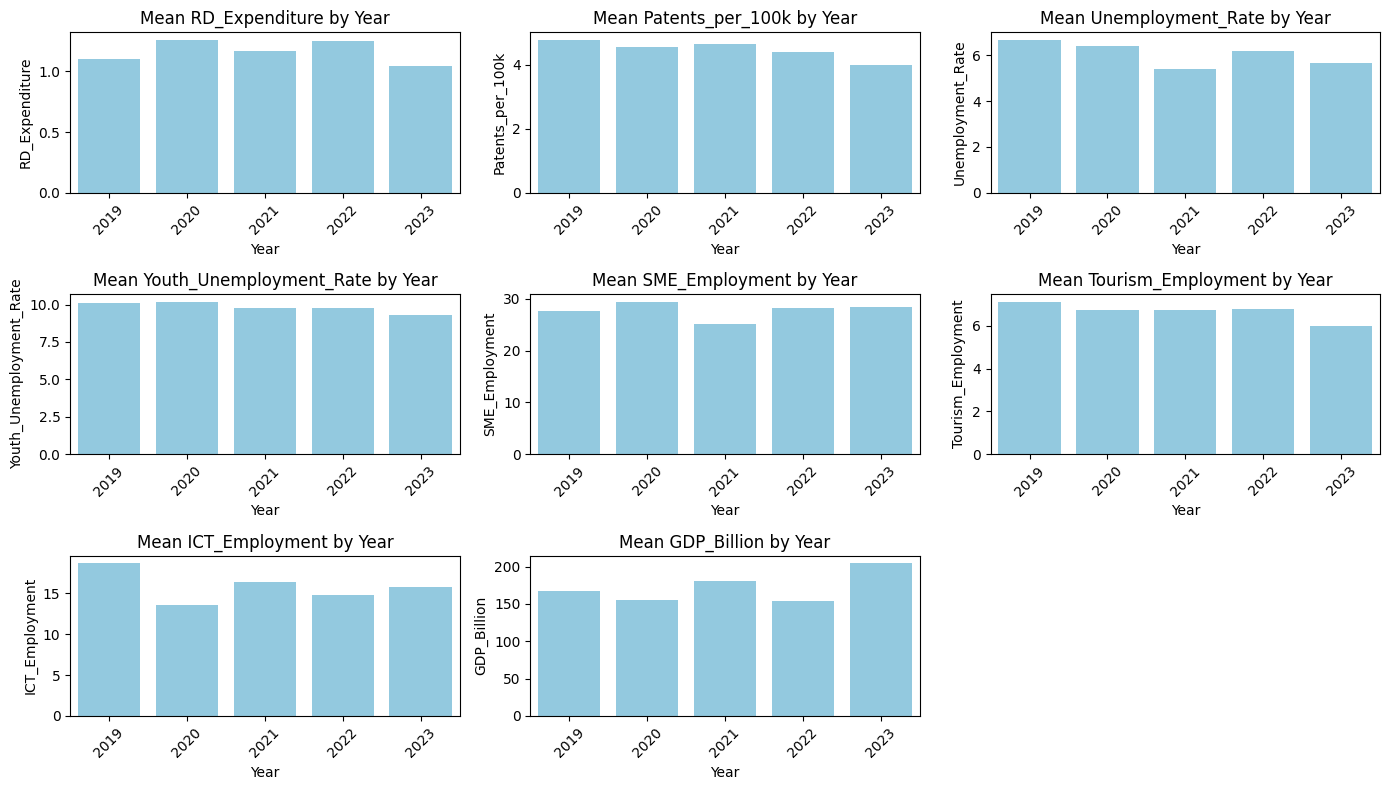

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean for each economic productivity column by Year
mean_productivity_by_year = cleaned_data.groupby('Year')[economic_productivity_columns].mean().reset_index()

# Set up the figure for plotting
plt.figure(figsize=(14, 8))

# Plot bar plots for each economic productivity metric
for i, col in enumerate(economic_productivity_columns, 1):
    plt.subplot(3, 3, i)  # Create a 3x3 grid of subplots
    sns.barplot(x='Year', y=col, data=mean_productivity_by_year, color='skyblue')
    plt.title(f"Mean {col} by Year", fontsize=12)
    plt.xlabel('Year', fontsize=10)
    plt.ylabel(col, fontsize=10)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


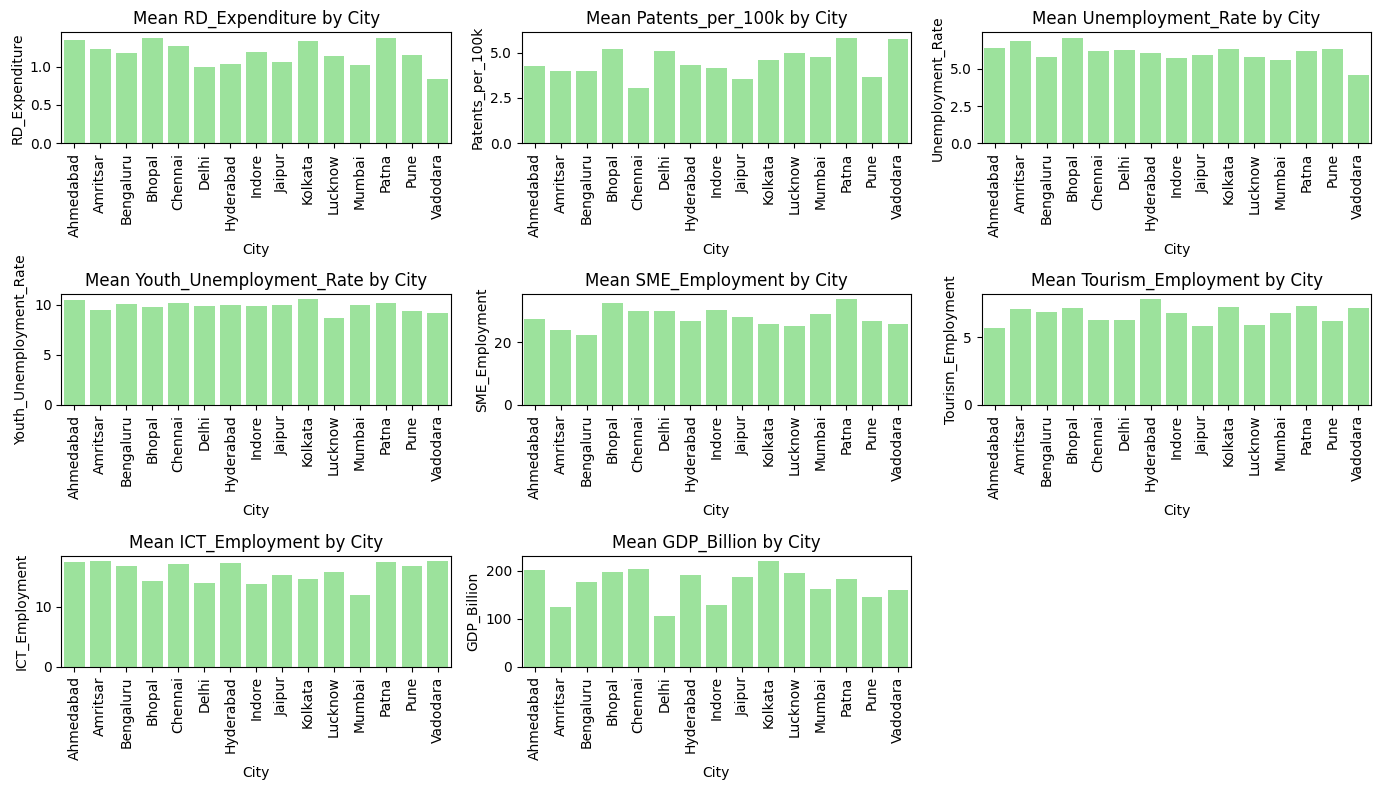

In [ ]:
# Calculate the mean for each economic productivity column by City
mean_productivity_by_city = cleaned_data.groupby('City')[economic_productivity_columns].mean().reset_index()

# Set up the figure for plotting
plt.figure(figsize=(14, 8))

# Plot bar plots for each economic productivity metric
for i, col in enumerate(economic_productivity_columns, 1):
    plt.subplot(3, 3, i)  # Create a 3x3 grid of subplots
    sns.barplot(x='City', y=col, data=mean_productivity_by_city, color='lightgreen')
    plt.title(f"Mean {col} by City", fontsize=12)
    plt.xlabel('City', fontsize=10)
    plt.ylabel(col, fontsize=10)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


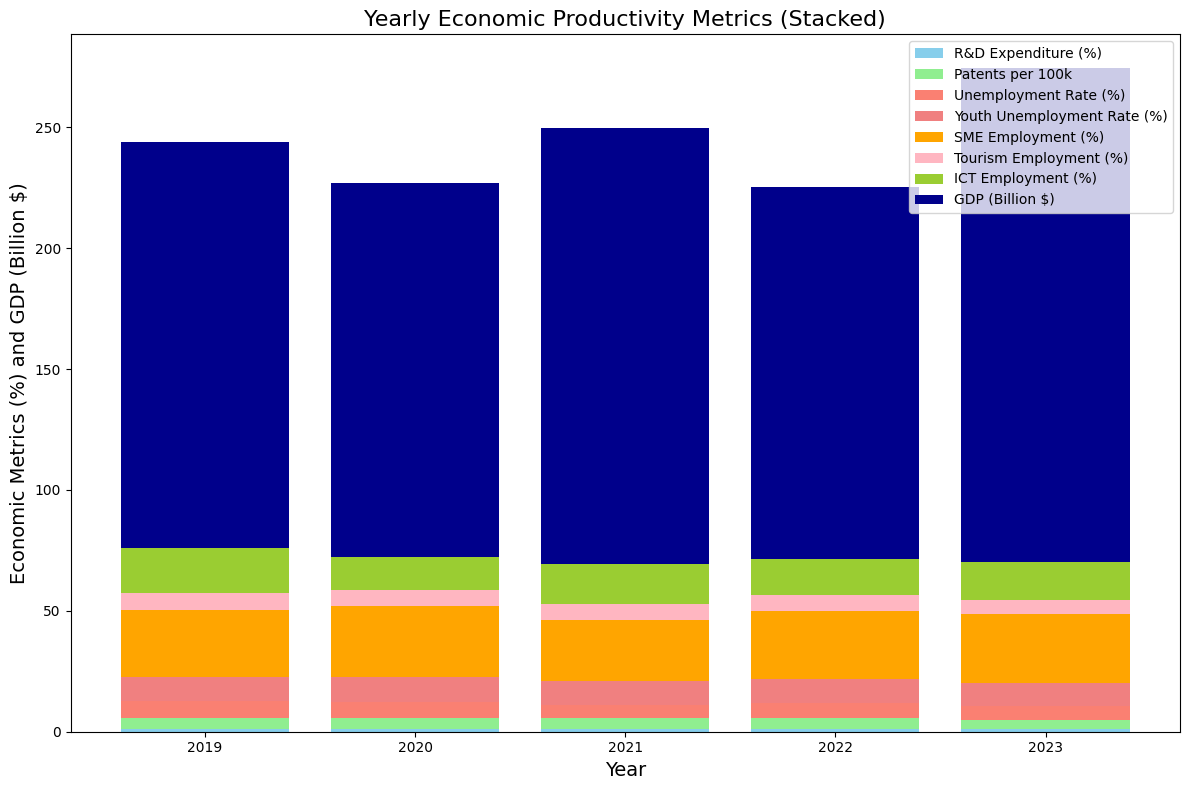

In [ ]:
import matplotlib.pyplot as plt

# Calculate yearly mean for economic productivity columns
mean_productivity_by_year = cleaned_data.groupby('Year')[economic_productivity_columns].mean().reset_index()

# Set up the figure for plotting
plt.figure(figsize=(12, 8))

# Plot the stacked bar plot for economic productivity metrics
plt.bar(mean_productivity_by_year['Year'], mean_productivity_by_year['RD_Expenditure'], label='R&D Expenditure (%)', color='skyblue')
plt.bar(mean_productivity_by_year['Year'], mean_productivity_by_year['Patents_per_100k'], label='Patents per 100k',
        bottom=mean_productivity_by_year['RD_Expenditure'], color='lightgreen')
plt.bar(mean_productivity_by_year['Year'], mean_productivity_by_year['Unemployment_Rate'], label='Unemployment Rate (%)',
        bottom=mean_productivity_by_year['RD_Expenditure'] + mean_productivity_by_year['Patents_per_100k'], color='salmon')
plt.bar(mean_productivity_by_year['Year'], mean_productivity_by_year['Youth_Unemployment_Rate'], label='Youth Unemployment Rate (%)',
        bottom=mean_productivity_by_year['RD_Expenditure'] + mean_productivity_by_year['Patents_per_100k'] + mean_productivity_by_year['Unemployment_Rate'], color='lightcoral')
plt.bar(mean_productivity_by_year['Year'], mean_productivity_by_year['SME_Employment'], label='SME Employment (%)',
        bottom=mean_productivity_by_year['RD_Expenditure'] + mean_productivity_by_year['Patents_per_100k'] + mean_productivity_by_year['Unemployment_Rate'] + mean_productivity_by_year['Youth_Unemployment_Rate'], color='orange')
plt.bar(mean_productivity_by_year['Year'], mean_productivity_by_year['Tourism_Employment'], label='Tourism Employment (%)',
        bottom=mean_productivity_by_year['RD_Expenditure'] + mean_productivity_by_year['Patents_per_100k'] + mean_productivity_by_year['Unemployment_Rate'] + mean_productivity_by_year['Youth_Unemployment_Rate'] + mean_productivity_by_year['SME_Employment'], color='lightpink')
plt.bar(mean_productivity_by_year['Year'], mean_productivity_by_year['ICT_Employment'], label='ICT Employment (%)',
        bottom=mean_productivity_by_year['RD_Expenditure'] + mean_productivity_by_year['Patents_per_100k'] + mean_productivity_by_year['Unemployment_Rate'] + mean_productivity_by_year['Youth_Unemployment_Rate'] + mean_productivity_by_year['SME_Employment'] + mean_productivity_by_year['Tourism_Employment'], color='yellowgreen')
plt.bar(mean_productivity_by_year['Year'], mean_productivity_by_year['GDP_Billion'], label='GDP (Billion $)',
        bottom=mean_productivity_by_year['RD_Expenditure'] + mean_productivity_by_year['Patents_per_100k'] + mean_productivity_by_year['Unemployment_Rate'] + mean_productivity_by_year['Youth_Unemployment_Rate'] + mean_productivity_by_year['SME_Employment'] + mean_productivity_by_year['Tourism_Employment'] + mean_productivity_by_year['ICT_Employment'], color='darkblue')

# Add title and labels
plt.title("Yearly Economic Productivity Metrics (Stacked)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Economic Metrics (%) and GDP (Billion $)", fontsize=14)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
!pip install google-search-results --upgrade  # Ensure the latest version is installed
from googlesearch import search

# Define the search query
query = "GDP and productivity of Indian cities site:.gov.in OR site:.org OR site:.edu"

# Search for relevant URLs (using 'tld' for num_results)
urls = []
for j in search(query, tld="co.in", num=10, stop=10, pause=2):
    urls.append(j)

# Print the discovered URLs
print("Discovered URLs:")
for url in urls:
    print(url)


  Preparing metadata (setup.py) ... done
  Created wheel for google-search-results: filename=google_search_results-2.4.2-py3-none-any.whl size=32009 sha256=f9d2806960f88e074d450bf5d63d3a2f7b984ff22e2fdae4d819dc39bd0f8f9e
  Stored in directory: /root/.cache/pip/wheels/d3/b2/c3/03302d12bb44a2cdff3c9371f31b72c0c4e84b8d2285eeac53
Successfully built google-search-results
Discovered URLs:
https://www.niti.gov.in/sites/default/files/2022-05/Mod_CEOG_Executive_Summary_18052022.pdf
https://www.worldbank.org/en/news/opinion/2024/01/30/gearing-up-for-india-s-rapid-urban-transformation
https://www.orfonline.org/expert-speak/indias-economic-rise-is-not-translating-into-a-rise-in-city-liveability
https://labour.gov.in/sites/default/files/Chapter%20-%204.pdf
https://smartnet.niua.org/sites/default/files/resources/city_gdp_measurement_framework-for_web.pdf
https://www.adb.org/sites/default/files/publication/977981/harnessing-economic-potential-india-cities.pdf
https://static.pib.gov.in/WriteReadData/s